# Aprendizaje Automático

* Ya revisamos la técnica más sencilla de clasificación, Naïve Bayes.
* Hay otra técnica básica muy usada antes de ver los temas avanzados: Regresión Lineal.

## Regresión Lineal
El método de regresión lineal presenta algunas ventajas:  
* Puede hacerse con pocos datos $\sim 300$.  
* Es muy sencillo de construir e implementar.  
* El efecto de las variables puede interpretarse de forma intuitiva.
* No requiere gran poder de cómputo

También supone algunas desventajas:
* Tiene un desempeño limitado
* Asume que no existe correlación entre las variables. (También el método de Bayes)

Un modelo lineal asume que, si una variable aleatoria $y$ está correlacionada con un conjunto de $N$ variables $\vec{x}$, la esperanza de $y$, dado que se tienen los valor $x^k$, está dada por:
$$
E(y|x^k) = \sum_{k=1}^{N} \beta_{k} x ^{k} + \beta_0.
$$

Fueron ampliamente desarrolladas y usadas antes de la estadística computacional, y funcionan en situaciones donde se tienen pocos datos, donde el cociente de señal a ruido es $\sim 1$, o se tienen datos con poca separación. Incluso en algunas situaciones, pueden desempeñarse mejor que otros métodos más sofisticados.

Usando el método de mínimos cuadrados, es fácil encontrar una expresión para los $\beta_k$ en términos de los datos $x^{k}_{i}$ y $y_{i}$ de entrenamiento:

$$
\left(\begin{array}. 
\hat{\beta}_0 \\
\hat{\beta}_1 \\
\vdots \\
\hat{\beta}_k \\
\vdots \\
\hat{\beta}_N
\end{array}\right) 
= 
\left(\begin{array}.
n & n\bar{x}^{1}  & \ldots & n\bar{x}^{k} & \ldots & n\bar{x}^{N}\\
n\bar{x}^{1} & \sum (x^{1}_i)^2 & \ldots & \sum x^{k}_ix^{1}_i& \ldots & \sum x^{N}_ix^{1}_i\\
\vdots & \vdots & \ddots & \vdots & \ldots & \vdots\\
n\bar{x}^{1} & \sum x^{1}_ix^{k}_i & \ldots & \sum (x^{k}_i)^2& \ldots & \sum x^{N}_ix^{k}_i\\
\vdots & \vdots & \ldots & \vdots & \ddots & \vdots\\
n\bar{x}^{1} & \sum x^{1}_ix^{N}_i & \ldots & \sum x^{k}_ix^{N}_i& \ldots & \sum (x^{N}_i)^2
\end{array}\right)^{\Large -1}
\left(\begin{array}. 
n\bar{y} \\ 
\sum x^{1}_iy_i \\
\vdots \\
\sum x^{k}_iy_i \\
\vdots \\
\sum x^{N}_iy_i
\end{array}\right),
$$ 
donde todas las sumas van de $1\ldots n$, donde $n$ es el número de datos.

**Es importante notar, que las variables usadas en una regresión lineal deben tener algúna interpretación cuantitativa. Es decir, si las variables con categorías, deben ser binarias.**  
Usemos las siguientes variables para crear nuestro modelo lineal:
* `amount`,
* `savings_acc_numeric`, 
* `p_employment_time_numeric`,
* `installment_rate`, 
* `p_residence_time`,
* `age`,
* `number_of_credits`,
* `dependants`,
* `has_phone_numeric`,
* `foreign_worker_numeric`

In [1]:
from linnear_model import LinnearModel
from pandas import read_csv as read_csv
df = read_csv('data/german.data.all-numeric.csv',header=0)
df_training = df.sample(frac=0.7, replace=False, random_state=1)
df_testing = df.drop(df_training.index)
linnear_score = []
varnames =['amount', 'savings_acc_numeric', 'p_employment_time_numeric', 'installment_rate', 'p_residence_time',
             'age', 'number_of_credits', 'dependants', 'has_phone_numeric', 'foreign_worker_numeric']
lm = LinnearModel(varnames)
lm.train()
for row in df_testing.iterrows():
    row = row[1]
    myvars = {'amount': row['amount'],
            'savings_acc_numeric': row['savings_acc_numeric'],
            'p_employment_time_numeric': row['p_employment_time_numeric'],
            'installment_rate': row['installment_rate'],
            'p_residence_time': row['p_residence_time'],
            'age': row['age'],
            'number_of_credits': row['number_of_credits'],
            'dependants': row['dependants'],
            'has_phone_numeric': row['has_phone_numeric'],
            'foreign_worker_numeric': row['foreign_worker_numeric']}
    myscore = lm.score(myvars)
    linnear_score.append(myscore)
df_testing['linnear_score'] = linnear_score

In [2]:
df_testing.head(10)

,checking_acc_numeric,time_credit_acc,credit_history_numeric,purpose_numeric,amount,savings_acc_numeric,p_employment_time_numeric,installment_rate,marita_status_sex_numeric,other_debtors_numeric,...,age,other_installment_numeric,housing_numeric,number_of_credits,job_numeric,dependants,has_phone_numeric,foreign_worker_numeric,is_good,linnear_score
7,2,36,4,4,6948,1,3,2,1,1,...,35,0,2,1,4,1,1,1,1,0.643094
10,2,12,4,2,1295,1,2,3,2,1,...,25,0,2,1,3,1,0,1,2,0.672193
15,1,24,4,1,1282,2,3,4,2,1,...,32,0,1,1,2,1,0,1,2,0.665924
20,4,9,3,2,2134,1,3,4,1,1,...,48,0,1,3,3,1,1,1,1,0.757510
21,1,6,4,1,2647,3,3,2,1,1,...,44,0,2,1,3,2,0,1,1,0.689109
22,1,10,3,2,2241,1,2,1,1,1,...,48,0,2,2,2,2,0,0,1,0.923323
24,4,10,3,3,2069,0,3,2,3,1,...,26,0,1,2,3,1,0,0,1,0.962427
25,1,6,4,3,1374,1,3,1,1,1,...,36,2,1,1,2,1,1,1,1,0.930998
26,4,6,0,1,426,1,5,4,3,1,...,39,0,1,1,2,1,0,1,1,0.771905
28,2,7,4,1,2415,1,3,3,1,2,...,34,0,1,1,3,1,0,1,1,0.676908


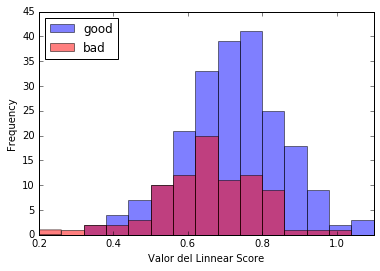

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from numpy import arange, array
linnear_scores_range = arange(0.2,1.1,0.06)
df_good = df_testing[df_testing['is_good']==1] 
df_bad = df_testing[df_testing['is_good']!=1]
htest_good = df_good['linnear_score'].plot.hist(bins=linnear_scores_range,color='b',alpha=0.5,label='good')
htest_bad = df_bad['linnear_score'].plot.hist(bins=linnear_scores_range,color='r',alpha=0.5,label='bad')
plt.legend(loc='upper left')
plt.xlabel('Valor del Linnear Score')

In [4]:
from bootstrap import bootstrapped_utility
from pandas import DataFrame
bs_f = bootstrapped_utility(df_testing=df_testing,varname='linnear_score', bins = linnear_scores_range)
bs_df = DataFrame(bs_f)
bs_df = bs_df.transpose()
for n in range(0,100):
    bs_f = bootstrapped_utility(df_testing=df_testing,varname='linnear_score', bins = linnear_scores_range)
    bs_df_tmp = DataFrame(bs_f)
    bs_df_tmp = bs_df_tmp.transpose()
    bs_df.loc[n]=bs_df_tmp.loc[0]      
bs_results=bs_df.describe()
bs_results

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,8500.000000,16870.000000,25510.00000,29950.000000,22090.000000,9730.000000,44350.000000,24670.000000,730.000000,-135380.000000,-263900.000000,-330740.000000,-429800.000000,-476960.000000,-481160.000000
std,107142.640692,108234.841475,108747.45974,108330.617682,109025.814291,111509.555237,105648.108016,94016.338039,80570.798906,70919.185762,48116.336292,32694.675686,23992.423046,15764.632453,10055.120812
min,-230000.000000,-230000.000000,-221000.00000,-197000.000000,-188000.000000,-218000.000000,-191000.000000,-239000.000000,-260000.000000,-371000.000000,-386000.000000,-398000.000000,-482000.000000,-512000.000000,-500000.000000
25%,-80000.000000,-66500.000000,-57500.00000,-56000.000000,-59750.000000,-74750.000000,-34250.000000,-38000.000000,-53750.000000,-188000.000000,-293000.000000,-353750.000000,-446000.000000,-488750.000000,-488000.000000
50%,25000.000000,32500.000000,41500.00000,37000.000000,28000.000000,17500.000000,55000.000000,35500.000000,1000.000000,-138500.000000,-266000.000000,-333500.000000,-431000.000000,-476000.000000,-482000.000000
75%,85000.000000,89500.000000,104500.00000,112000.000000,94750.000000,91750.000000,118750.000000,98500.000000,57250.000000,-85250.000000,-238250.000000,-310250.000000,-412250.000000,-464000.000000,-476000.000000
max,265000.000000,274000.000000,292000.00000,301000.000000,292000.000000,292000.000000,313000.000000,229000.000000,193000.000000,37000.000000,-143000.000000,-242000.000000,-377000.000000,-446000.000000,-458000.000000


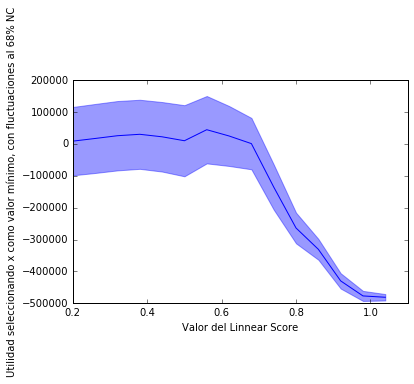

In [5]:
bs_mean = bs_results.loc['mean',]
bs_std = bs_results.loc['std',]
plt.plot(linnear_scores_range[:(len(bs_mean))], bs_mean, 'k', color='blue')
plt.fill_between(linnear_scores_range[:(len(bs_mean))], bs_mean-bs_std, bs_mean+bs_std,
    alpha=0.4, edgecolor='blue', facecolor='blue')
plt.xlabel('Valor del Linnear Score')
plt.ylabel('Utilidad seleccionando x como valor mínimo, con fluctuaciones al 68% NC')

## Random Forest
### Arboles de decisión


In [6]:
from sklearn.datasets import load_iris
from sklearn import tree

varnames = ['amount',
            'savings_acc_numeric',
            "credit_history_numeric",
            'p_employment_time_numeric',
            'installment_rate',
            'p_residence_time',
            'age',
            'number_of_credits',
            'dependants',
            'has_phone_numeric',
            'foreign_worker_numeric']
training_data = df_training.as_matrix(columns=varnames)
training_target = df_training.as_matrix(columns=['is_good'])
clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_data, training_target)

In [7]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [8]:
testing_data = df_testing.as_matrix(columns=varnames)
df_testing['decision_tree'] = clf.predict_proba(testing_data)[:,0]
df_testing['decision_tree_pred'] = clf.predict(testing_data)
df_testing.head(10)

,checking_acc_numeric,time_credit_acc,credit_history_numeric,purpose_numeric,amount,savings_acc_numeric,p_employment_time_numeric,installment_rate,marita_status_sex_numeric,other_debtors_numeric,...,housing_numeric,number_of_credits,job_numeric,dependants,has_phone_numeric,foreign_worker_numeric,is_good,linnear_score,decision_tree,decision_tree_pred
7,2,36,4,4,6948,1,3,2,1,1,...,2,1,4,1,1,1,1,0.643094,1.0,1
10,2,12,4,2,1295,1,2,3,2,1,...,2,1,3,1,0,1,2,0.672193,1.0,1
15,1,24,4,1,1282,2,3,4,2,1,...,1,1,2,1,0,1,2,0.665924,0.0,2
20,4,9,3,2,2134,1,3,4,1,1,...,1,3,3,1,1,1,1,0.757510,1.0,1
21,1,6,4,1,2647,3,3,2,1,1,...,2,1,3,2,0,1,1,0.689109,1.0,1
22,1,10,3,2,2241,1,2,1,1,1,...,2,2,2,2,0,0,1,0.923323,1.0,1
24,4,10,3,3,2069,0,3,2,3,1,...,1,2,3,1,0,0,1,0.962427,1.0,1
25,1,6,4,3,1374,1,3,1,1,1,...,1,1,2,1,1,1,1,0.930998,0.0,2
26,4,6,0,1,426,1,5,4,3,1,...,1,1,2,1,0,1,1,0.771905,0.0,2
28,2,7,4,1,2415,1,3,3,1,2,...,1,1,3,1,0,1,1,0.676908,1.0,1


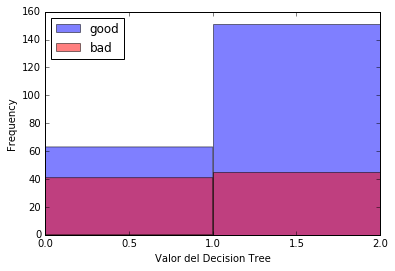

In [9]:
dt_scores_range = arange(0.0,3.0,1.0)
df_good = df_testing[df_testing['is_good']==1] 
df_bad = df_testing[df_testing['is_good']!=1]
htest_good = df_good['decision_tree'].plot.hist(bins=dt_scores_range,color='b',alpha=0.5,label='good')
htest_bad = df_bad['decision_tree'].plot.hist(bins=dt_scores_range,color='r',alpha=0.5,label='bad')
plt.legend(loc='upper left')
plt.xlabel('Valor del Decision Tree')

In [10]:
bs_f = bootstrapped_utility(df_testing=df_testing,varname='decision_tree', bins = dt_scores_range)
bs_df = DataFrame(bs_f)
bs_df = bs_df.transpose()
for n in range(0,100):
    bs_f = bootstrapped_utility(df_testing=df_testing,varname='decision_tree', bins = dt_scores_range)
    bs_df_tmp = DataFrame(bs_f)
    bs_df_tmp = bs_df_tmp.transpose()
    bs_df.loc[n]=bs_df_tmp.loc[0]      
bs_results=bs_df.describe()
bs_results

,0,1
count,100.000000,100.0
mean,14920.000000,-500000.0
std,87750.182595,0.0
min,-245000.000000,-500000.0
25%,-50750.000000,-500000.0
50%,25000.000000,-500000.0
75%,84250.000000,-500000.0
max,217000.000000,-500000.0


### Ensamble de árboles

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=400)
clf = clf.fit(training_data, training_target.ravel())

In [12]:
testing_data = df_testing.as_matrix(columns=varnames)
df_testing['random_forest'] = clf.predict_proba(testing_data)[:,0]
df_testing['random_forest_pred'] = clf.predict(testing_data)
df_testing.head(10)

,checking_acc_numeric,time_credit_acc,credit_history_numeric,purpose_numeric,amount,savings_acc_numeric,p_employment_time_numeric,installment_rate,marita_status_sex_numeric,other_debtors_numeric,...,job_numeric,dependants,has_phone_numeric,foreign_worker_numeric,is_good,linnear_score,decision_tree,decision_tree_pred,random_forest,random_forest_pred
7,2,36,4,4,6948,1,3,2,1,1,...,4,1,1,1,1,0.643094,1.0,1,0.7025,1
10,2,12,4,2,1295,1,2,3,2,1,...,3,1,0,1,2,0.672193,1.0,1,0.7100,1
15,1,24,4,1,1282,2,3,4,2,1,...,2,1,0,1,2,0.665924,0.0,2,0.6875,1
20,4,9,3,2,2134,1,3,4,1,1,...,3,1,1,1,1,0.757510,1.0,1,0.8800,1
21,1,6,4,1,2647,3,3,2,1,1,...,3,2,0,1,1,0.689109,1.0,1,0.8075,1
22,1,10,3,2,2241,1,2,1,1,1,...,2,2,0,0,1,0.923323,1.0,1,0.9175,1
24,4,10,3,3,2069,0,3,2,3,1,...,3,1,0,0,1,0.962427,1.0,1,0.8925,1
25,1,6,4,3,1374,1,3,1,1,1,...,2,1,1,1,1,0.930998,0.0,2,0.8825,1
26,4,6,0,1,426,1,5,4,3,1,...,2,1,0,1,1,0.771905,0.0,2,0.3775,2
28,2,7,4,1,2415,1,3,3,1,2,...,3,1,0,1,1,0.676908,1.0,1,0.7525,1


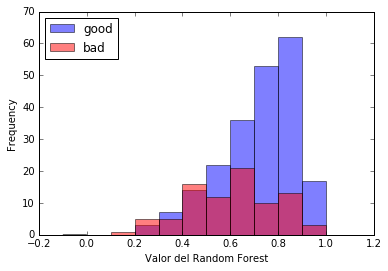

In [13]:
rf_scores_range = arange(-0.1,1.2,0.1)
df_good = df_testing[df_testing['is_good']==1] 
df_bad = df_testing[df_testing['is_good']!=1]
htest_good = df_good['random_forest'].plot.hist(bins=rf_scores_range,color='b',alpha=0.5,label='good')
htest_bad = df_bad['random_forest'].plot.hist(bins=rf_scores_range,color='r',alpha=0.5,label='bad')
plt.legend(loc='upper left')
plt.xlabel('Valor del Random Forest')

In [14]:
bs_f = bootstrapped_utility(df_testing=df_testing,varname='random_forest', bins = rf_scores_range)
bs_df = DataFrame(bs_f)
bs_df = bs_df.transpose()
for n in range(0,100):
    bs_f = bootstrapped_utility(df_testing=df_testing,varname='random_forest', bins = rf_scores_range)
    bs_df_tmp = DataFrame(bs_f)
    bs_df_tmp = bs_df_tmp.transpose()
    bs_df.loc[n]=bs_df_tmp.loc[0]      
bs_results=bs_df.describe()
bs_results

,0,1,2,3,4,5,6,7,8,9,10,11
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,14650.000000,14650.000000,14650.000000,23200.000000,51940.000000,55990.000000,119230.000000,92230.000000,63850.000000,-164000.000000,-420170.000000,-500000.0
std,131558.749407,131558.749407,131558.749407,129675.118522,125086.864364,123727.747311,111965.169097,99565.506075,82687.115628,56716.199385,29993.620534,0.0
min,-305000.000000,-305000.000000,-305000.000000,-296000.000000,-260000.000000,-233000.000000,-125000.000000,-176000.000000,-116000.000000,-296000.000000,-494000.000000,-500000.0
25%,-80000.000000,-80000.000000,-80000.000000,-65000.000000,-38000.000000,-38000.000000,42250.000000,22000.000000,7000.000000,-197750.000000,-440000.000000,-500000.0
50%,10000.000000,10000.000000,10000.000000,22000.000000,55000.000000,61000.000000,121000.000000,97000.000000,65500.000000,-164000.000000,-422000.000000,-500000.0
75%,88750.000000,88750.000000,88750.000000,103000.000000,124000.000000,129250.000000,188500.000000,148750.000000,124000.000000,-131000.000000,-404000.000000,-500000.0
max,355000.000000,355000.000000,355000.000000,355000.000000,379000.000000,376000.000000,379000.000000,340000.000000,274000.000000,-17000.000000,-350000.000000,-500000.0


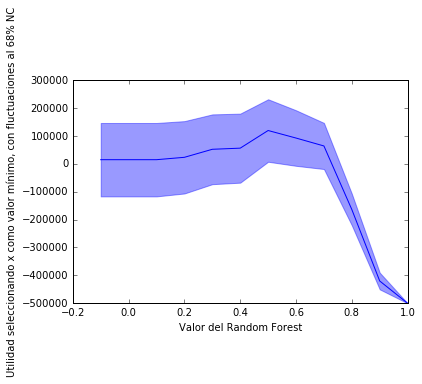

In [15]:
bs_mean = bs_results.loc['mean',]
bs_std = bs_results.loc['std',]
plt.plot(rf_scores_range[:(len(bs_mean))], bs_mean, 'k', color='blue')
plt.fill_between(rf_scores_range[:(len(bs_mean))], bs_mean-bs_std, bs_mean+bs_std,
    alpha=0.4, edgecolor='blue', facecolor='blue')
plt.xlabel('Valor del Random Forest')
plt.ylabel('Utilidad seleccionando x como valor mínimo, con fluctuaciones al 68% NC')

## Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier
varnames =["checking_acc_numeric",
           "purpose_numeric",
           "marita_status_sex_numeric",
           "other_debtors_numeric",
           "property_numeric",
           "other_installment_numeric",
           "housing_numeric",
           "job_numeric"]
training_data = df_training.as_matrix(columns=varnames)
training_target = df_training.as_matrix(columns=['is_good'])
clf = KNeighborsClassifier(n_neighbors=10)
clf = clf.fit(training_data, training_target.ravel())

In [17]:
testing_data = df_testing.as_matrix(columns=varnames)
df_testing['nearest_neighbors'] = clf.predict_proba(testing_data)[:,0]
df_testing['nearest_neighbors_pred'] = clf.predict(testing_data)
df_testing.head(10)

,checking_acc_numeric,time_credit_acc,credit_history_numeric,purpose_numeric,amount,savings_acc_numeric,p_employment_time_numeric,installment_rate,marita_status_sex_numeric,other_debtors_numeric,...,has_phone_numeric,foreign_worker_numeric,is_good,linnear_score,decision_tree,decision_tree_pred,random_forest,random_forest_pred,nearest_neighbors,nearest_neighbors_pred
7,2,36,4,4,6948,1,3,2,1,1,...,1,1,1,0.643094,1.0,1,0.7025,1,0.9,1
10,2,12,4,2,1295,1,2,3,2,1,...,0,1,2,0.672193,1.0,1,0.7100,1,0.6,1
15,1,24,4,1,1282,2,3,4,2,1,...,0,1,2,0.665924,0.0,2,0.6875,1,0.6,1
20,4,9,3,2,2134,1,3,4,1,1,...,1,1,1,0.757510,1.0,1,0.8800,1,1.0,1
21,1,6,4,1,2647,3,3,2,1,1,...,0,1,1,0.689109,1.0,1,0.8075,1,0.7,1
22,1,10,3,2,2241,1,2,1,1,1,...,0,0,1,0.923323,1.0,1,0.9175,1,0.7,1
24,4,10,3,3,2069,0,3,2,3,1,...,0,0,1,0.962427,1.0,1,0.8925,1,0.8,1
25,1,6,4,3,1374,1,3,1,1,1,...,1,1,1,0.930998,0.0,2,0.8825,1,0.6,1
26,4,6,0,1,426,1,5,4,3,1,...,0,1,1,0.771905,0.0,2,0.3775,2,0.9,1
28,2,7,4,1,2415,1,3,3,1,2,...,0,1,1,0.676908,1.0,1,0.7525,1,0.8,1


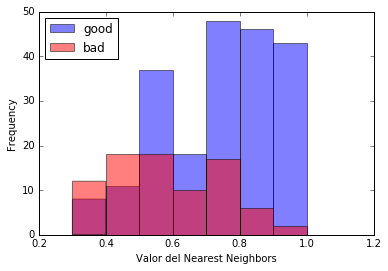

In [18]:
nn_scores_range = arange(0.3,1.2,0.1)
df_good = df_testing[df_testing['is_good']==1] 
df_bad = df_testing[df_testing['is_good']!=1]
htest_good = df_good['nearest_neighbors'].plot.hist(bins=nn_scores_range,color='b',alpha=0.5,label='good')
htest_bad = df_bad['nearest_neighbors'].plot.hist(bins=nn_scores_range,color='r',alpha=0.5,label='bad')
plt.legend(loc='upper left')
plt.xlabel('Valor del Nearest Neighbors')

In [19]:
bs_f = bootstrapped_utility(df_testing=df_testing,varname='nearest_neighbors', bins = nn_scores_range)
bs_df = DataFrame(bs_f)
bs_df = bs_df.transpose()
for n in range(0,100):
    bs_f = bootstrapped_utility(df_testing=df_testing,varname='nearest_neighbors', bins = nn_scores_range)
    bs_df_tmp = DataFrame(bs_f)
    bs_df_tmp = bs_df_tmp.transpose()
    bs_df.loc[n]=bs_df_tmp.loc[0]      
bs_results=bs_df.describe()
bs_results

,0,1,2,3,4,5,6,7
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.0
mean,78070.000000,176110.000000,151840.000000,114640.00000,98830.000000,-42350.000000,-261770.00000,-500000.0
std,114150.375303,98185.959929,90449.463539,86318.94346,74509.175762,54736.351557,38830.85699,0.0
min,-176000.000000,-53000.000000,-86000.000000,-92000.00000,-50000.000000,-185000.000000,-347000.00000,-500000.0
25%,1000.000000,99250.000000,81250.000000,54250.00000,40000.000000,-80000.000000,-287000.00000,-500000.0
50%,92500.000000,185500.000000,169000.000000,118000.00000,103000.000000,-44000.000000,-263000.00000,-500000.0
75%,166000.000000,253750.000000,217750.000000,175750.00000,151750.000000,1750.000000,-233000.00000,-500000.0
max,337000.000000,403000.000000,370000.000000,343000.00000,259000.000000,100000.000000,-146000.00000,-500000.0


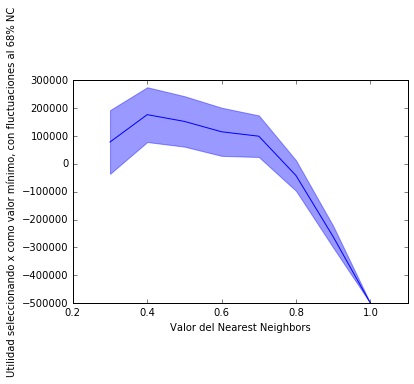

In [20]:
bs_mean = bs_results.loc['mean',]
bs_std = bs_results.loc['std',]
plt.plot(nn_scores_range[:(len(bs_mean))], bs_mean, 'k', color='blue')
plt.fill_between(nn_scores_range[:(len(bs_mean))], bs_mean-bs_std, bs_mean+bs_std,
    alpha=0.4, edgecolor='blue', facecolor='blue')
plt.xlabel('Valor del Nearest Neighbors')
plt.ylabel('Utilidad seleccionando x como valor mínimo, con fluctuaciones al 68% NC')